In [62]:
# 数据分析和探索
import pandas as pd
import numpy as np
import random as rnd
import tensorflow as tf

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# 获取数据，训练集train_df，测试集test_df，合并集合combine（便于对特征进行处理时统一处理：for df in combine:）
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [64]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
# 查看各特征非空样本量及字段类型
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [66]:
# 查看数值类（int，float）特征的数据分布情况
train_df.describe()

D:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
# 查看非数值类（object类型）特征的数据分布情况
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Davidson, Mr. Thornton",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [68]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)
# 富人和中等阶层有更高的生还率，底层生还率低

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [69]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)
# 性别和是否生还强相关，女性用户的生还率明显高于男性

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [70]:
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)
# 有0到2个兄弟姐妹或配偶的生还几率会高于有更多的

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [71]:
train_df[["Parch","Survived"]].groupby(["Parch"],as_index = False).mean().sort_values(by="Survived",ascending=False)
# 相关

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


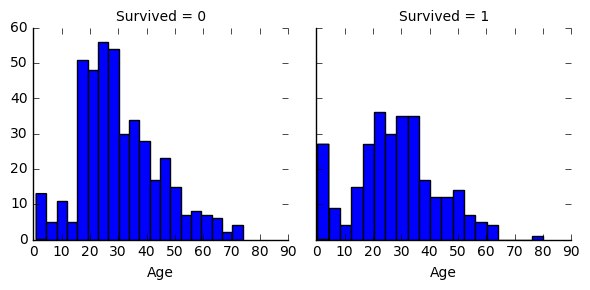

In [72]:
g = sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Age",bins=20)
# 婴幼儿的生存几率更大

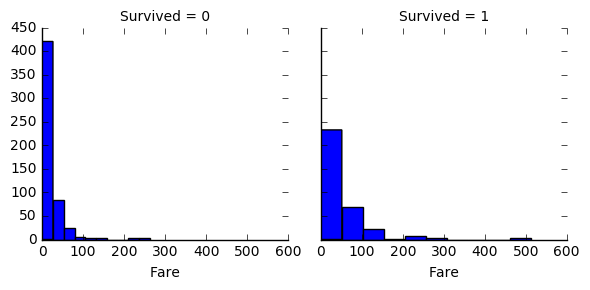

In [73]:

# Fare
g = sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Fare",bins=10)
# 票价最便宜的幸存几率低

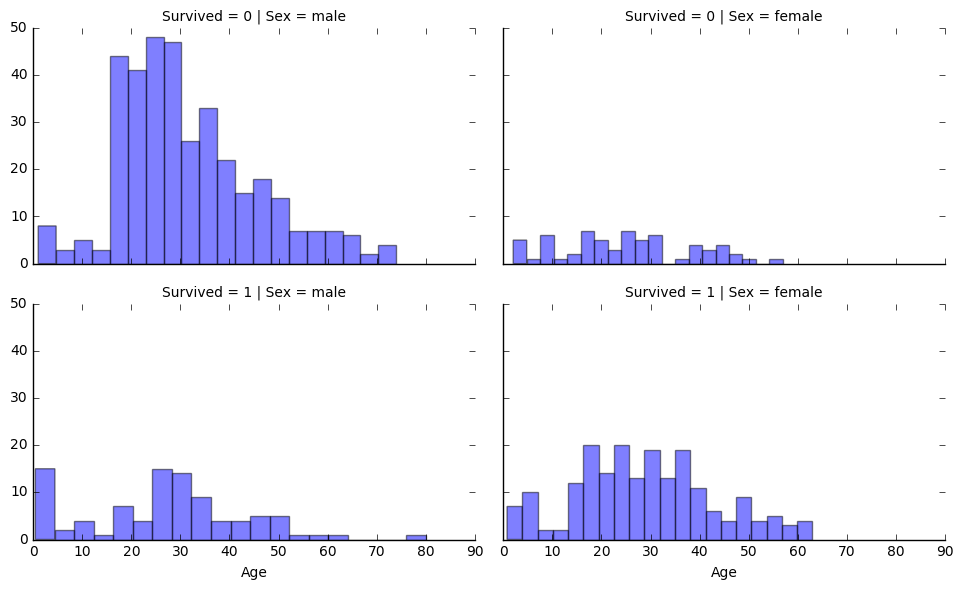

In [74]:
grid = sns.FacetGrid(train_df,row="Survived",col="Sex",aspect=1.6)
grid.map(plt.hist,"Age",alpha=.5,bins=20)
grid.add_legend()
# 女性的幸存率更高，各年龄段均高于50%
# 男性中只有婴幼儿幸存率高于50%，年龄最大的男性（近80岁）幸存

D:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


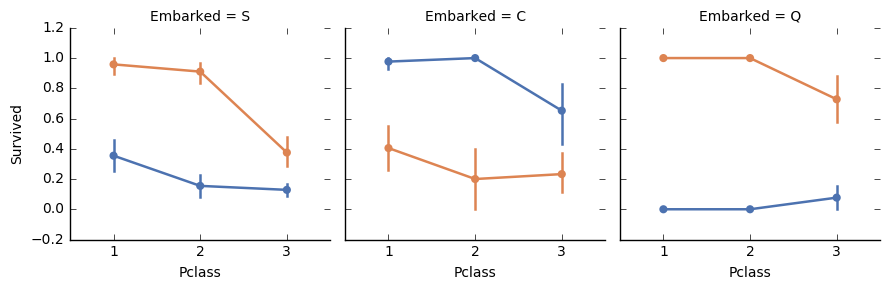

In [75]:
grid1 = sns.FacetGrid(train_df,col="Embarked")
grid1.map(sns.pointplot,"Pclass","Survived","Sex",palette = "deep")
#

D:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Program Files\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


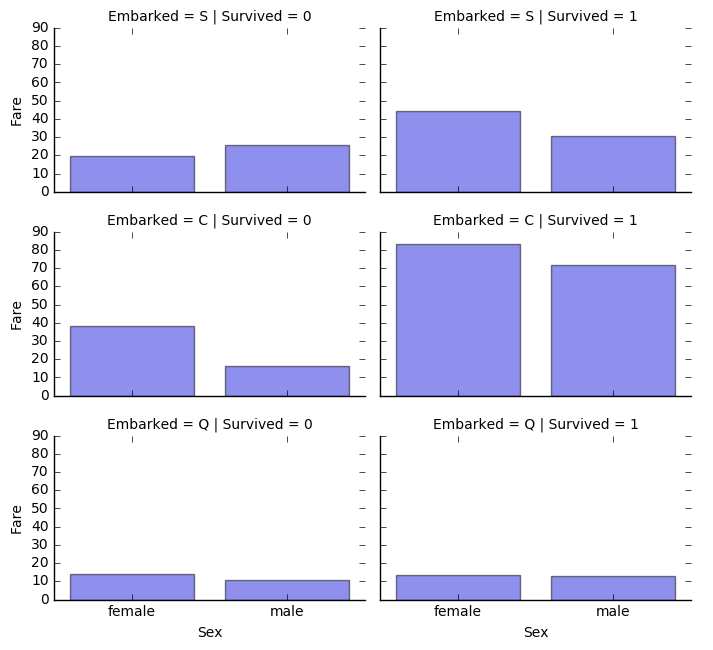

In [76]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [77]:
# Some features of my own that I have added in
# Gives the length of the name
train_df['NameLength'] = train_df['Name'].apply(len)
test_df['NameLength'] = test_df['Name'].apply(len)

In [78]:
# Feature that tells whether a passenger had a cabin on the Titanic
train_df['HasCabin'] = train_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_df['HasCabin'] = test_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [79]:
# 剔除Ticket（人为判断无关联）和Cabin（有效数据太少）两个特征
train_df = train_df.drop(["Ticket","Cabin"],axis=1)
test_df = test_df.drop(["Ticket","Cabin"],axis=1)
combine = [train_df,test_df]
print(train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

(891, 12) (418, 11) (891, 12) (418, 11)


In [80]:
# 根据姓名创建称号特征，会包含性别和阶层信息
# dataset.Name.str.extract(' ([A-Za-z]+)\.' -> 把空格开头.结尾的字符串抽取出来
# 和性别匹配，看各类称号分别属于男or女，方便后续归类

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex']).sort_values(by=["male","female"],ascending=False)

Sex,female,male
Title,,
Mr,0,517
Master,0,40
Dr,1,6
Rev,0,6
Col,0,2
Major,0,2
Capt,0,1
Don,0,1
Jonkheer,0,1


In [81]:
# 把称号归类为Mr,Miss,Mrs,Master,Rare_Male,Rare_Female(按男性和女性区分了Rare)
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(['Lady', 'Countess', 'Dona'],"Rare_Female")
    dataset["Title"] = dataset["Title"].replace(['Capt', 'Col','Don','Dr','Major',
                                                 'Rev','Sir','Jonkheer',],"Rare_Male")
    dataset["Title"] = dataset["Title"].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Miss')

In [82]:
# 按Title汇总计算Survived均值，查看相关性
train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare_Female,1.000000
5,Rare_Male,0.285714


In [83]:
# title特征映射为数值
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare_Female":5,"Rare_Male":6}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    # 为了避免有空数据的常规操作
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,23,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,51,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,22,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,44,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,24,0,1


In [84]:
# Name字段可以剔除了
# 训练集的PassengerId字段仅为自增字段，与预测无关，可剔除
train_df = train_df.drop(["Name","PassengerId"],axis=1)
test_df = test_df.drop(["Name"],axis=1)

In [85]:
# 每次删除特征时都要重新combine
combine = [train_df,test_df]
combine[0].shape,combine[1].shape

((891, 11), (418, 11))

In [86]:
# sex特征映射为数值
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female":1,"male":0}).astype(int)
    # 后面加astype(int)是为了避免处理为布尔型？
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title
0,0,3,0,22.0,1,0,7.2500,S,23,0,1
1,1,1,1,38.0,1,0,71.2833,C,51,1,3
2,1,3,1,26.0,0,0,7.9250,S,22,0,2
3,1,1,1,35.0,1,0,53.1000,S,44,1,3
4,0,3,0,35.0,0,0,8.0500,S,24,0,1


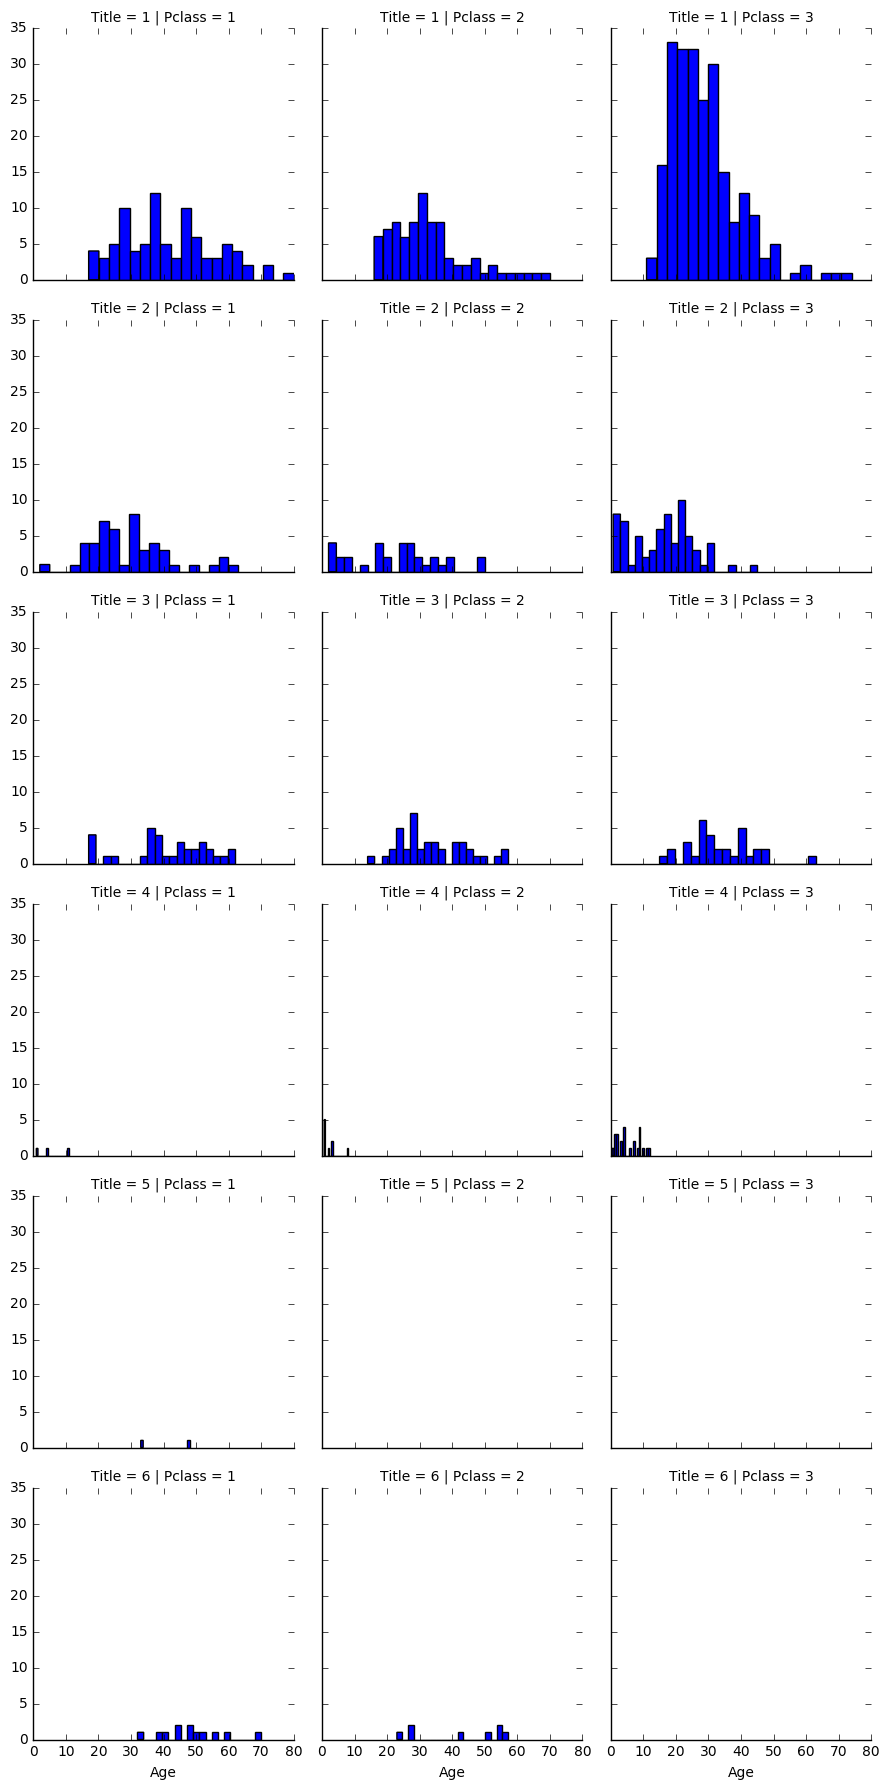

In [87]:
# 对Age字段的空值进行预测补充
# 取相同Pclass和Title的年龄中位数进行补充（Demo为Pclass和Sex）

grid = sns.FacetGrid(train_df,col="Pclass",row="Title")
grid.map(plt.hist,"Age",bins=20)

In [88]:
guess_ages = np.zeros((6,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [89]:
# 给age年龄字段的空值填充估值
# 使用相同Pclass和Title的Age中位数来替代（对于中位数为空的组合，使用Title整体的中位数来替代）


for dataset in combine:
    # 取6种组合的中位数
    for i in range(0, 6):
        
        for j in range(0, 3):
            guess_title_df = dataset[dataset["Title"]==i+1]["Age"].dropna()
            
            guess_df = dataset[(dataset['Title'] == i+1) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median() if ~np.isnan(guess_df.median()) else guess_title_df.median()
            #print(i,j,guess_df.median(),guess_title_df.median(),age_guess)
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    # 给满足6中情况的Age字段赋值
    for i in range(0, 6):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Title == i+1) & (dataset.Pclass == j+1),
                        'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title
0,0,3,0,22,1,0,7.2500,S,23,0,1
1,1,1,1,38,1,0,71.2833,C,51,1,3
2,1,3,1,26,0,0,7.9250,S,22,0,2
3,1,1,1,35,1,0,53.1000,S,44,1,3
4,0,3,0,35,0,0,8.0500,S,24,0,1


In [90]:
#创建是否儿童特征
for dataset in combine:
    dataset.loc[dataset["Age"] > 12,"IsChildren"] = 0
    dataset.loc[dataset["Age"] <= 12,"IsChildren"] = 1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title,IsChildren
0,0,3,0,22,1,0,7.2500,S,23,0,1,0.0
1,1,1,1,38,1,0,71.2833,C,51,1,3,0.0
2,1,3,1,26,0,0,7.9250,S,22,0,2,0.0
3,1,1,1,35,1,0,53.1000,S,44,1,3,0.0
4,0,3,0,35,0,0,8.0500,S,24,0,1,0.0


In [91]:
# 创建年龄区间特征
# pd.cut是按值的大小均匀切分，每组值区间大小相同，但样本数可能不一致
# pd.qcut是按照样本在值上的分布频率切分，每组样本数相同
train_df["AgeBand"] = pd.qcut(train_df["Age"],8)
train_df[["AgeBand","Survived"]].groupby(["AgeBand"],as_index = False).mean().sort_values(by="AgeBand",ascending=True)

,AgeBand,Survived
0,"[0, 17]",0.538462
1,"(17, 21]",0.362903
2,"(21, 25]",0.393939
3,"(25, 26]",0.120370
4,"(26, 31]",0.414062
5,"(31, 36.5]",0.478261
6,"(36.5, 45]",0.388430
7,"(45, 80]",0.372549


In [92]:
# 把年龄按区间标准化为0到4
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 17, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 21), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 21) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 26), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 31), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 36.5), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 36.5) & (dataset['Age'] <= 45), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 7
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title,IsChildren,AgeBand
0,0,3,0,2,1,0,7.2500,S,23,0,1,0.0,"(21, 25]"
1,1,1,1,6,1,0,71.2833,C,51,1,3,0.0,"(36.5, 45]"
2,1,3,1,3,0,0,7.9250,S,22,0,2,0.0,"(25, 26]"
3,1,1,1,5,1,0,53.1000,S,44,1,3,0.0,"(31, 36.5]"
4,0,3,0,5,0,0,8.0500,S,24,0,1,0.0,"(31, 36.5]"


In [93]:
# 移除AgeBand特征
train_df = train_df.drop(["AgeBand"],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameLength,HasCabin,Title,IsChildren
0,0,3,0,2,1,0,7.2500,S,23,0,1,0.0
1,1,1,1,6,1,0,71.2833,C,51,1,3,0.0
2,1,3,1,3,0,0,7.9250,S,22,0,2,0.0
3,1,1,1,5,1,0,53.1000,S,44,1,3,0.0
4,0,3,0,5,0,0,8.0500,S,24,0,1,0.0


In [94]:
# 创建家庭规模FamilySize组合特征
for dataset in combine:
    dataset["FamilySize"] = dataset["Parch"] + dataset["SibSp"] + 1
train_df[["FamilySize","Survived"]].groupby(["FamilySize"],as_index = False).mean().sort_values(by="FamilySize",ascending=True)

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [95]:
# 创建是否独自一人IsAlone特征
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1,"IsAlone"] = 1
train_df[["IsAlone","Survived"]].groupby(["IsAlone"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [96]:
# 移除Parch,Sibsp,FamilySize（暂且保留试试）
# 给字段赋值可以在combine中循环操作，删除字段不可以，需要对指定的df进行操作
train_df = train_df.drop(["Parch","SibSp"],axis=1)
test_df = test_df.drop(["Parch","SibSp"],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,2,7.2500,S,23,0,1,0.0,2,0
1,1,1,1,6,71.2833,C,51,1,3,0.0,2,0
2,1,3,1,3,7.9250,S,22,0,2,0.0,1,1
3,1,1,1,5,53.1000,S,44,1,3,0.0,2,0
4,0,3,0,5,8.0500,S,24,0,1,0.0,1,1


In [97]:
# 给Embarked补充空值
# 获取上船最多的港口
freq_port = train_df["Embarked"].dropna().mode()[0]
freq_port

'S'

In [98]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)
train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [99]:
# 把Embarked数字化
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0,"C":1,"Q":2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,2,7.2500,0,23,0,1,0.0,2,0
1,1,1,1,6,71.2833,1,51,1,3,0.0,2,0
2,1,3,1,3,7.9250,0,22,0,2,0.0,1,1
3,1,1,1,5,53.1000,0,44,1,3,0.0,2,0
4,0,3,0,5,8.0500,0,24,0,1,0.0,1,1


In [100]:
# 去掉Embarked试试。。
#train_df = train_df.drop(["Embarked"],axis=1)
#test_df = test_df.drop(["Embarked"],axis=1)
#combine=[train_df,test_df]
#train_df.head()


In [101]:
# 给测试集中的Fare填充空值，使用中位数
test_df["Fare"].fillna(test_df["Fare"].dropna().median(),inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           418 non-null float64
Embarked       418 non-null int32
NameLength     418 non-null int64
HasCabin       418 non-null int64
Title          418 non-null int64
IsChildren     418 non-null float64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
dtypes: float64(2), int32(3), int64(7)
memory usage: 34.4 KB


In [102]:
# 创建FareBand区间特征
train_df["FareBand"] = pd.qcut(train_df["Fare"],4)
train_df[["FareBand","Survived"]].groupby(["FareBand"],as_index=False).mean().sort_values(by="FareBand",ascending=True)

,FareBand,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [103]:
# 根据FareBand将Fare特征转换为序数值
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,2,0,0,23,0,1,0.0,2,0
1,1,1,1,6,3,1,51,1,3,0.0,2,0
2,1,3,1,3,1,0,22,0,2,0.0,1,1
3,1,1,1,5,3,0,44,1,3,0.0,2,0
4,0,3,0,5,1,0,24,0,1,0.0,1,1
5,0,3,0,3,1,2,16,0,1,0.0,1,1
6,0,1,0,7,3,0,23,1,1,0.0,1,1
7,0,3,0,0,2,0,30,0,4,1.0,5,0
8,1,3,1,4,1,0,49,0,3,0.0,3,0
9,1,2,1,0,2,1,35,0,3,0.0,2,0


In [104]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,NameLength,HasCabin,Title,IsChildren,FamilySize,IsAlone
0,892,3,0,5,0,2,16,0,1,0.0,1,1
1,893,3,1,7,0,0,32,0,3,0.0,2,0
2,894,2,0,7,1,2,25,0,1,0.0,1,1
3,895,3,0,4,1,0,16,0,1,0.0,1,1
4,896,3,1,2,1,0,44,0,3,0.0,3,0
5,897,3,0,0,1,0,26,0,1,0.0,1,1
6,898,3,1,4,0,2,20,0,2,0.0,1,1
7,899,2,0,3,2,0,28,0,1,0.0,3,0
8,900,3,1,1,0,1,41,0,3,0.0,1,1
9,901,3,0,1,2,0,23,0,1,0.0,3,0


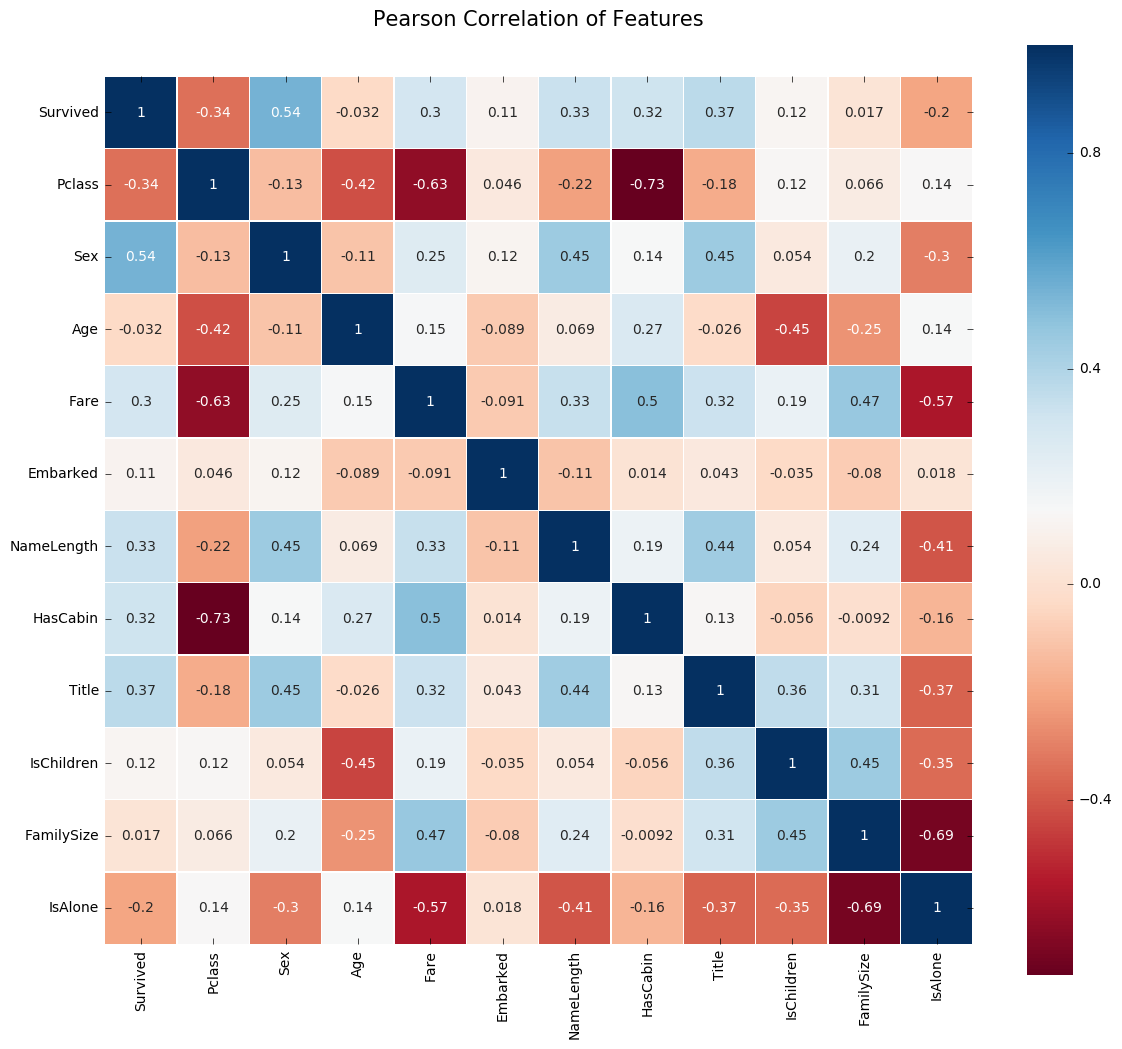

In [105]:
# 用seaborn的heatmap对特征之间的相关性进行可视化
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [106]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test_ = test_df.drop("PassengerId",axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape

((891, 11), (891,), (418, 11))

In [107]:
#训练集：dataset_X，dataset_Y     
dataset_X = X_train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','NameLength','HasCabin','Title','IsChildren','FamilySize','IsAlone']].values
train_df['Deceased'] = train_df['Survived'].apply(lambda x: 1 - x)
dataset_Y=train_df[['Deceased', 'Survived']].values
#测试集：X_test
X_test=X_test_[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked','NameLength','HasCabin','Title','IsChildren','FamilySize','IsAlone']].values
PassengerId=test_df['PassengerId']

In [108]:
x = tf.placeholder(tf.float32, shape=[None, 11])
y = tf.placeholder(tf.float32, shape=[None,2])
# 使用逻辑回归模型
#y = σ(wx + b)
weights = tf.Variable(tf.random_normal([11, 2]), name='weights')
bias = tf.Variable(tf.zeros([2]), name='bias')
y_pred = tf.nn.softmax(tf.matmul(x, weights) + bias)
# 定义交叉熵
cross_entropy = - tf.reduce_sum(y * tf.log(y_pred + 1e-10), reduction_indices=1)
#定义损失函数
cost = tf.reduce_mean(cross_entropy)
# 使用梯度下降优化算法最小化损失函数
lr = 0.001
train_op = tf.train.GradientDescentOptimizer(lr).minimize(cost)


In [109]:
with tf.Session() as sess:
    print('start training')
    tf.global_variables_initializer().run()
    for epoch in range(70):
            total_loss = 0
            for i in range(len(dataset_X)):
            # prepare feed data and run
                feed_dict = {x: [dataset_X[i]], y: [dataset_Y[i]]}
                var, loss = sess.run([train_op, cost], feed_dict=feed_dict)
                total_loss += loss
            # display loss per epoch
            print('Epoch: %04d, total loss=%.9f' % (epoch + 1, total_loss))
    print("Train Complete")

    # 测试模型
    predictions = np.argmax(sess.run(y_pred, feed_dict={x: X_test}), 1)
    # 保存结果
    submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": predictions
    })
    submission.to_csv("titanic-submission.csv", index=False)
    print('result saved')

start training
Epoch: 0001, total loss=6459.582044551
Epoch: 0002, total loss=980.471281188
Epoch: 0003, total loss=677.769217107
Epoch: 0004, total loss=580.194505227
Epoch: 0005, total loss=544.194216070
Epoch: 0006, total loss=526.636027896
Epoch: 0007, total loss=515.962032086
Epoch: 0008, total loss=508.350668270
Epoch: 0009, total loss=502.327286278
Epoch: 0010, total loss=497.250968245
Epoch: 0011, total loss=492.811649558
Epoch: 0012, total loss=488.843550477
Epoch: 0013, total loss=485.248924145
Epoch: 0014, total loss=481.964998726
Epoch: 0015, total loss=478.948390019
Epoch: 0016, total loss=476.167066120
Epoch: 0017, total loss=473.596368283
Epoch: 0018, total loss=471.216425245
Epoch: 0019, total loss=469.010815777
Epoch: 0020, total loss=466.965303232
Epoch: 0021, total loss=465.067767921
Epoch: 0022, total loss=463.307097400
Epoch: 0023, total loss=461.673533458
Epoch: 0024, total loss=460.157981752
Epoch: 0025, total loss=458.752053289
Epoch: 0026, total loss=457.448086